## Libraries

In [1]:
import numpy as np                          
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle          
import matplotlib.pyplot as plt             
import cv2                                  
import tensorflow as tf                     

## Categories

In [46]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

## Data loading

In [3]:
def load_data():
    """
        Load the data:
            - images to train the network.
            - images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory =  dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)   
        images = np.array(images, dtype = 'float32') 
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [5]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


## Distribution of Data

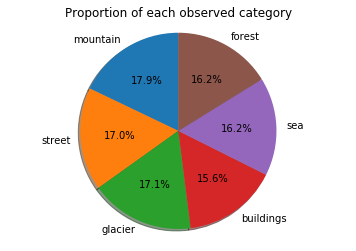

In [20]:

sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [21]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

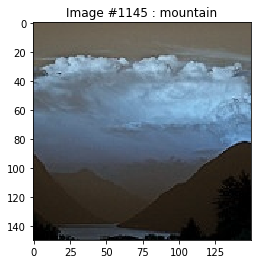

In [22]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

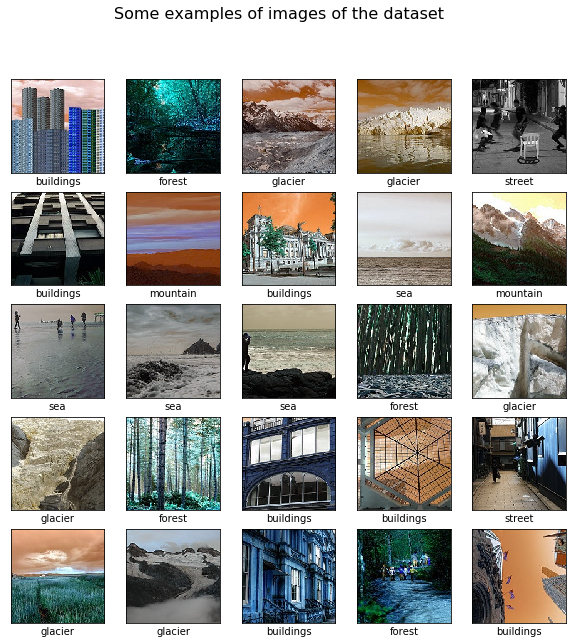

In [23]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model
Build the model,
Compile the model,
Train / fit the data to the model,
Evaluate the model on the testing set,
Carry out an error analysis of our model.
We can build an easy model composed of different layers such as:
Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
MaxPooling2D: The images get half sized.
Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
Relu : given a value x, returns max(x, 0).
Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - 878s 78ms/sample - loss: 1.2660 - accuracy: 0.5379 - val_loss: 0.9270 - val_accuracy: 0.6555
Epoch 2/5
11227/11227 [==============================] - 598s 53ms/sample - loss: 0.7819 - accuracy: 0.7066 - val_loss: 0.7659 - val_accuracy: 0.7086
Epoch 3/5
11227/11227 [==============================] - 440s 39ms/sample - loss: 0.5581 - accuracy: 0.7984 - val_loss: 0.6914 - val_accuracy: 0.7538
Epoch 4/5
11227/11227 [==============================] - 405s 36ms/sample - loss: 0.4093 - accuracy: 0.8555 - val_loss: 0.6181 - val_accuracy: 0.7870
Epoch 5/5
11227/11227 [==============================] - 448s 40ms/sample - loss: 0.2754 - accuracy: 0.9066 - val_loss: 0.6704 - val_accuracy: 0.7898


In [36]:
model.compile(optimizer = 'SGD', loss = 'KLD', metrics=['accuracy'])

In [37]:
history_new = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - 652s 58ms/sample - loss: 65.5583 - accuracy: 0.9791 - val_loss: 66.6084 - val_accuracy: 1.0000
Epoch 2/5
11227/11227 [==============================] - 466s 41ms/sample - loss: 66.0545 - accuracy: 1.0000 - val_loss: 66.6084 - val_accuracy: 1.0000
Epoch 3/5
11227/11227 [==============================] - 439s 39ms/sample - loss: 66.0545 - accuracy: 1.0000 - val_loss: 66.6084 - val_accuracy: 1.0000
Epoch 4/5
11227/11227 [==============================] - 394s 35ms/sample - loss: 66.0545 - accuracy: 1.0000 - val_loss: 66.6084 - val_accuracy: 1.0000
Epoch 5/5
11227/11227 [==============================] - 418s 37ms/sample - loss: 66.0545 - accuracy: 1.0000 - val_loss: 66.6084 - val_accuracy: 1.0000


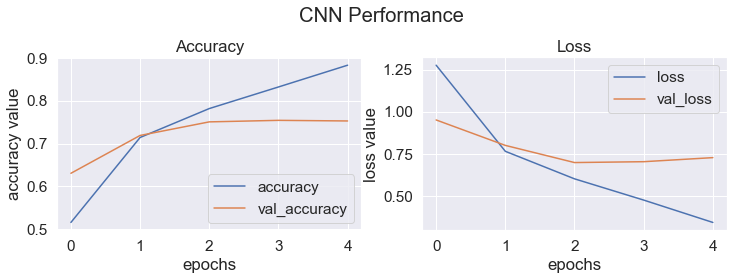

In [44]:
fig = plt.figure(figsize=(12,7))
plt.suptitle("CNN Performance")
plt.subplot(221)
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.title("Accuracy")
plt.ylabel("accuracy value")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.title("Loss")
plt.ylabel("loss value")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [50]:
test_loss = model.evaluate(test_images, test_labels)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Random Images

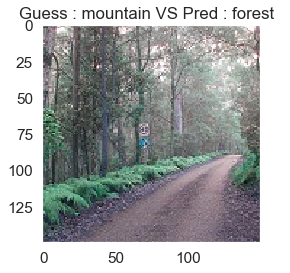

In [40]:
index = np.random.randint(test_images.shape[0]) 

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

## Random Mislabelled Images

In [31]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

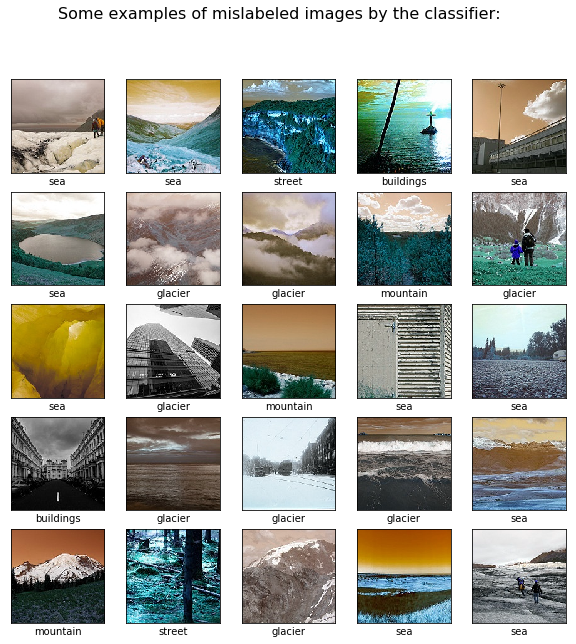

In [32]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

## Confusion Matrix

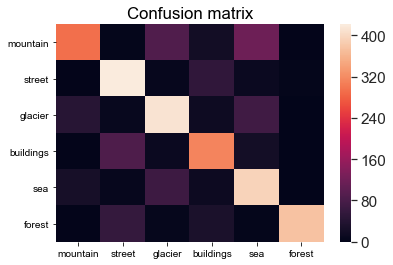

In [33]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()